In [ ]:
#Data analysis practice with AIFS data from ECMWF 
#https://cds.climate.copernicus.eu/datasets/seasonal-monthly-pressure-levels
#@author: yagizcanurkmez

In [2]:
import xarray as xr
import cfgrib

In [3]:
file_pt = "/Volumes/YagizHDD/Meteorological-Applications/DATA/CDS/Seasonal_forecast/ecmwf_seasonal_data_stratosphere.grib"
df = xr.open_dataset(file_pt,engine="cfgrib")

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


In [4]:
df

<xarray.Dataset> Size: 3MB
Dimensions:        (step: 6, isobaricInhPa: 4, latitude: 66, longitude: 91)
Coordinates:
    number         int64 8B ...
    time           datetime64[ns] 8B ...
  * step           (step) timedelta64[ns] 48B 28 days 59 days ... 181 days
  * isobaricInhPa  (isobaricInhPa) float64 32B 100.0 50.0 30.0 10.0
  * latitude       (latitude) float64 528B 90.0 89.0 88.0 ... 27.0 26.0 25.0
  * longitude      (longitude) float64 728B -25.0 -24.0 -23.0 ... 63.0 64.0 65.0
    valid_time     (step) datetime64[ns] 48B ...
Data variables:
    z              (step, isobaricInhPa, latitude, longitude) float32 577kB ...
    q              (step, isobaricInhPa, latitude, longitude) float32 577kB ...
    t              (step, isobaricInhPa, latitude, longitude) float32 577kB ...
    u              (step, isobaricInhPa, latitude, longitude) float32 577kB ...
    v              (step, isobaricInhPa, latitude, longitude) float32 577kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-03T09:31 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
import numpy as np

# Starting single datetime64 value
datetime_value = np.array(df.time)

# Timedelta values array (in nanoseconds)
timedelta_ns = np.array(df.step)  # Example values (43.2s, 86.4s, 129.6s)

# Adding each timedelta value to the same datetime value
new_datetime_values = datetime_value + timedelta_ns.astype('timedelta64[ns]')

print(datetime_value)
print(new_datetime_values)

2025-02-01T00:00:00.000000000
['2025-03-01T00:00:00.000000000' '2025-04-01T00:00:00.000000000'
 '2025-05-01T00:00:00.000000000' '2025-06-01T00:00:00.000000000'
 '2025-07-01T00:00:00.000000000' '2025-08-01T00:00:00.000000000']


In [92]:
import pandas as pd

df_months=pd.to_datetime(new_datetime_values).month
df_years =pd.to_datetime(new_datetime_values).year
months_str=["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"]
months_value=np.arange(1,13)

dict_month=dict(zip(months_value, months_str))

dict_month

{np.int64(1): 'Jan',
 np.int64(2): 'Feb',
 np.int64(3): 'Mar',
 np.int64(4): 'Apr',
 np.int64(5): 'May',
 np.int64(6): 'Jun',
 np.int64(7): 'July',
 np.int64(8): 'Aug',
 np.int64(9): 'Sep',
 np.int64(10): 'Oct',
 np.int64(11): 'Nov',
 np.int64(12): 'Dec'}

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


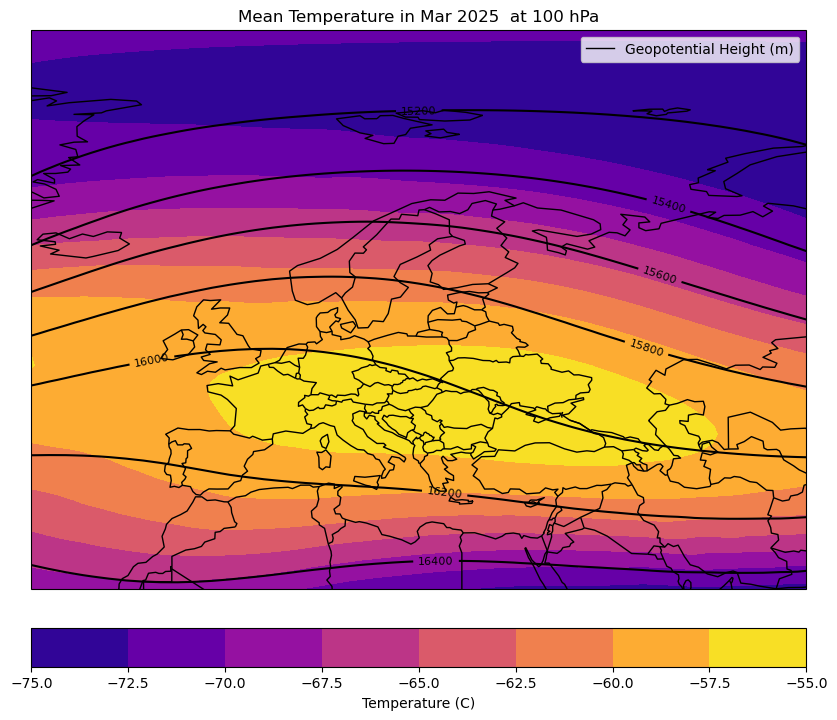

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


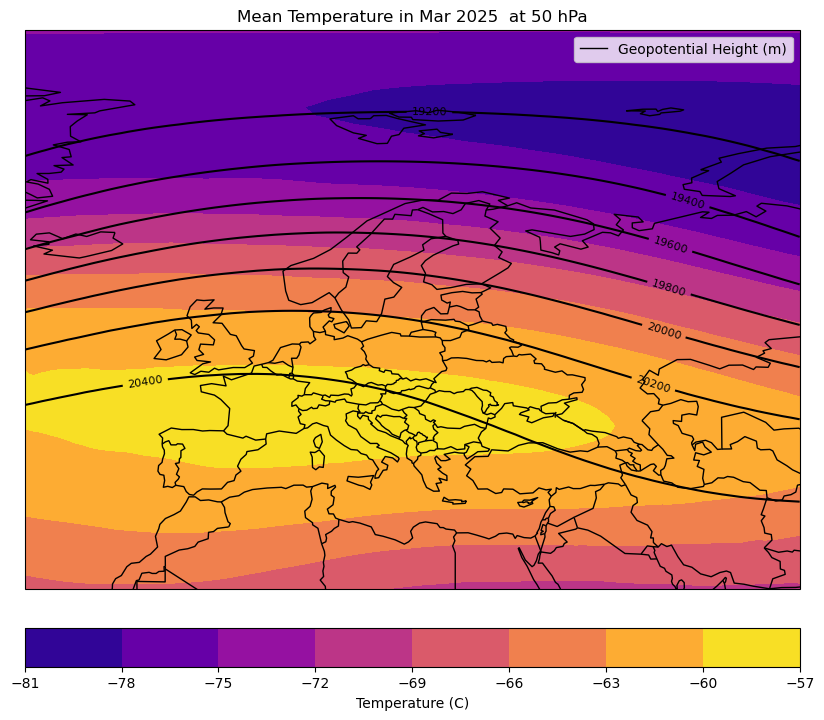

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


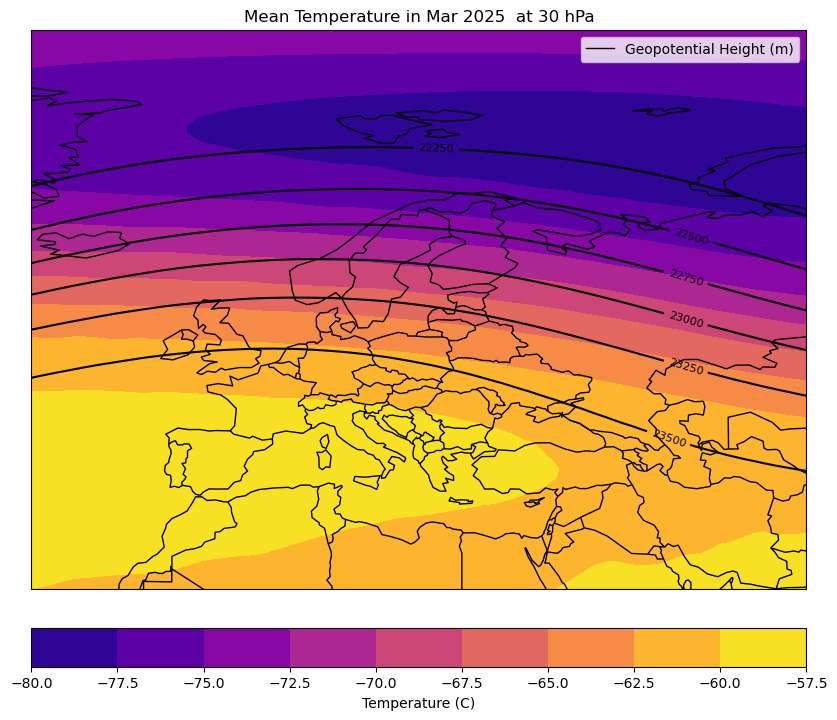

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


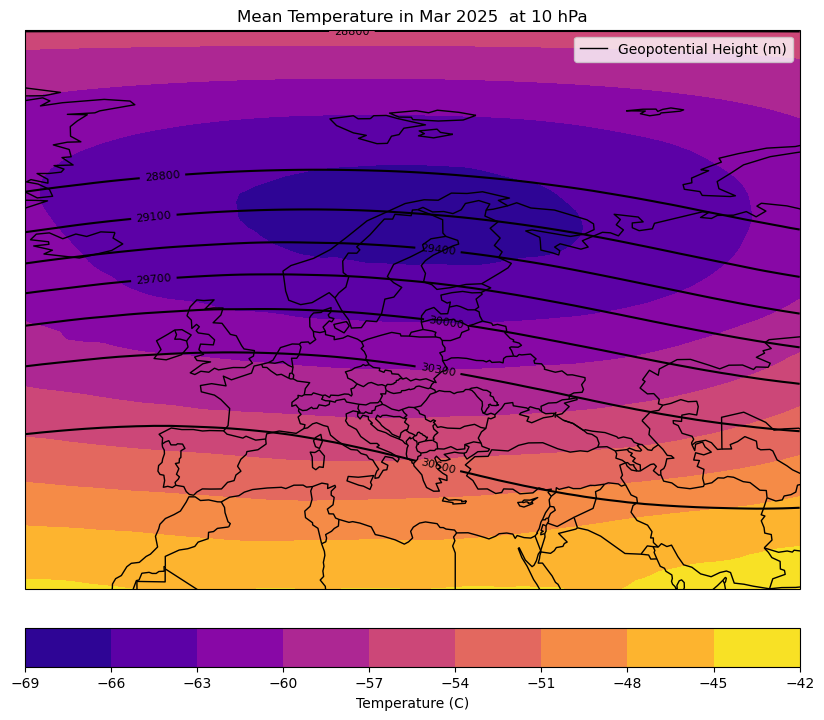

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


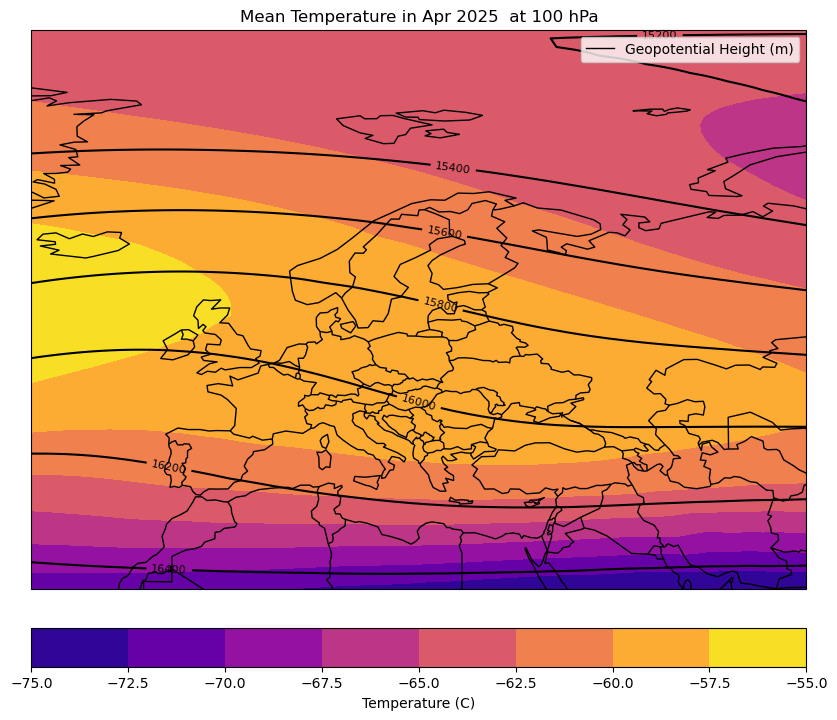

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


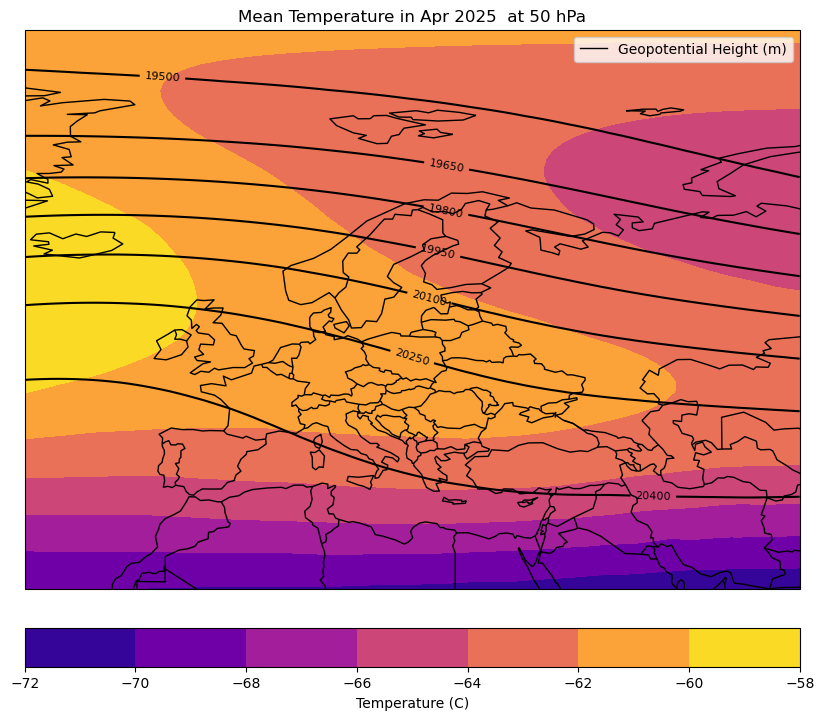

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


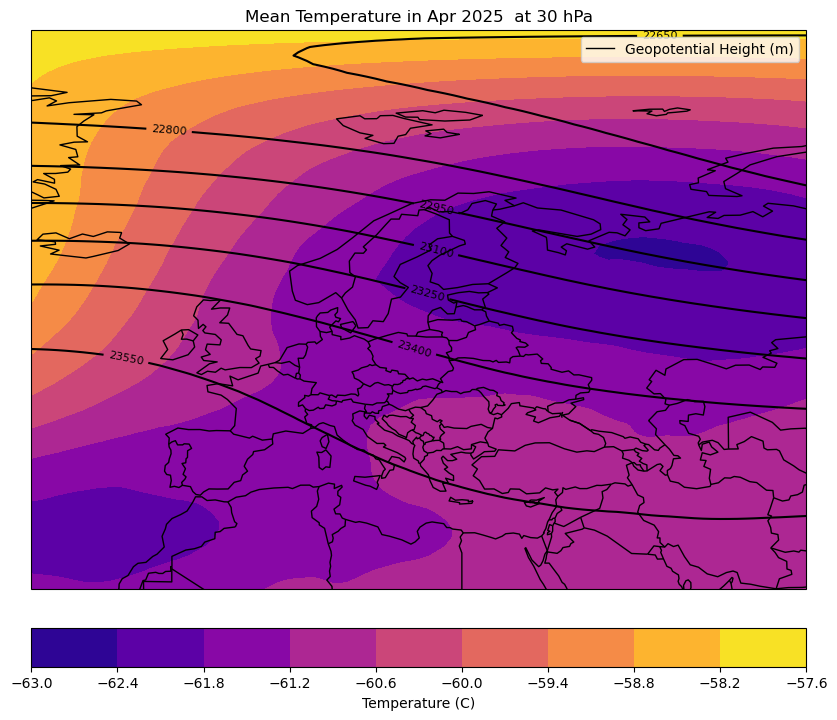

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


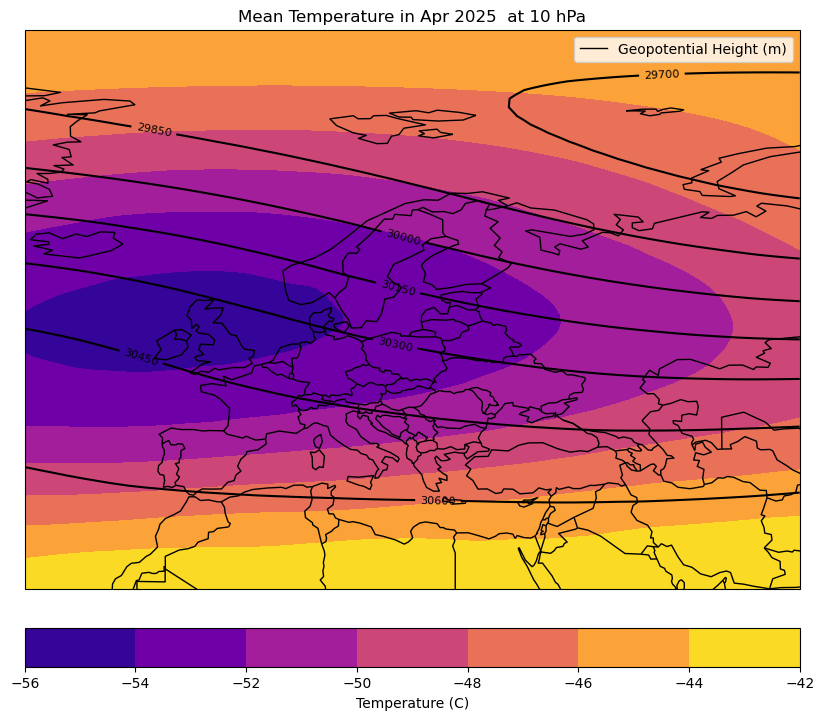

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


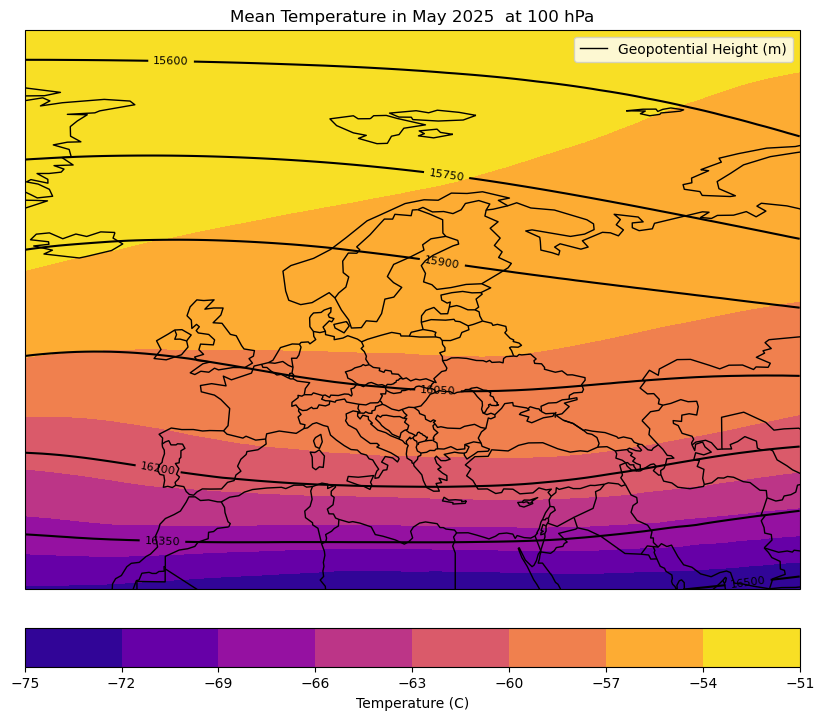

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


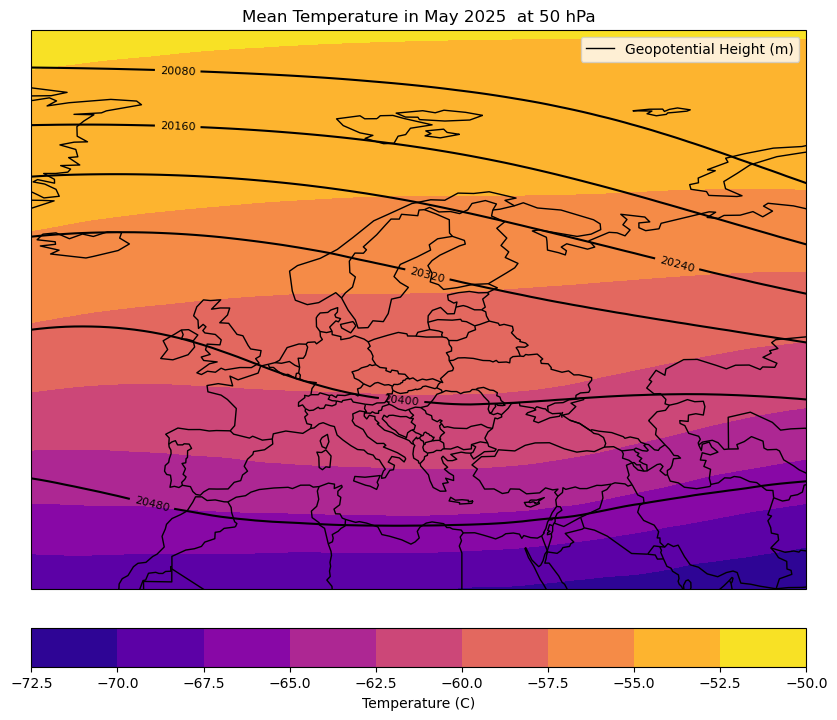

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


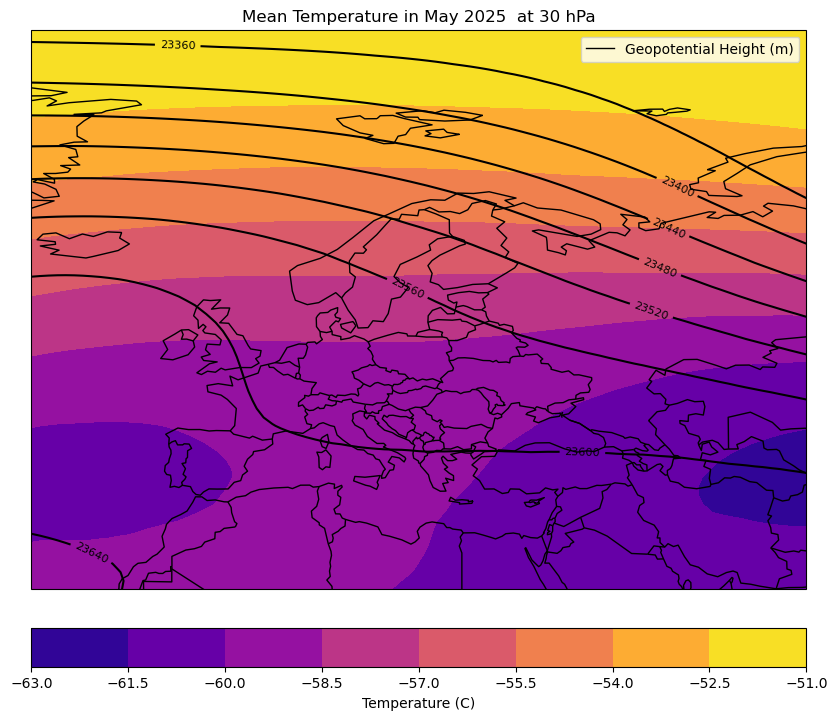

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


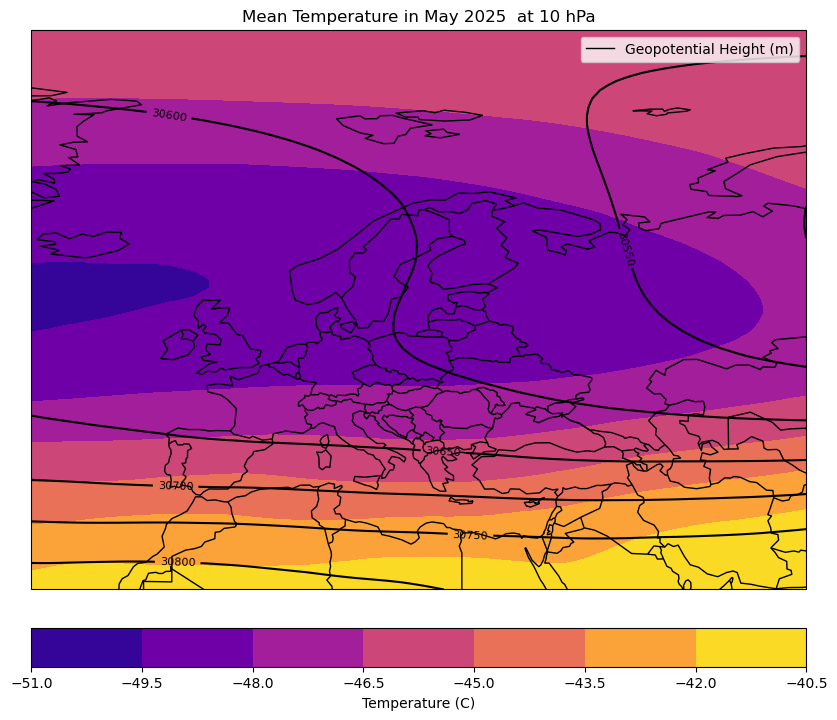

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


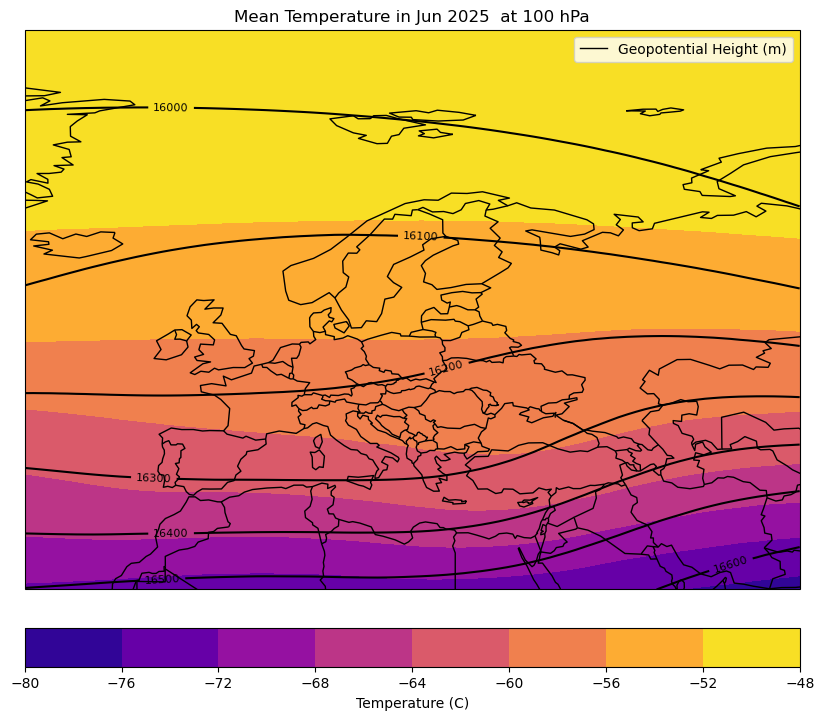

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


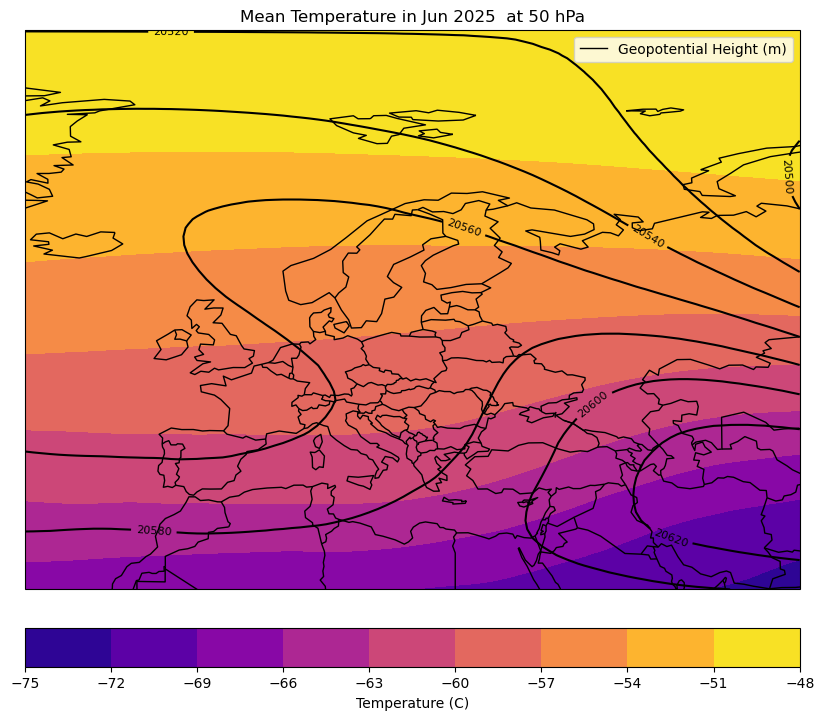

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


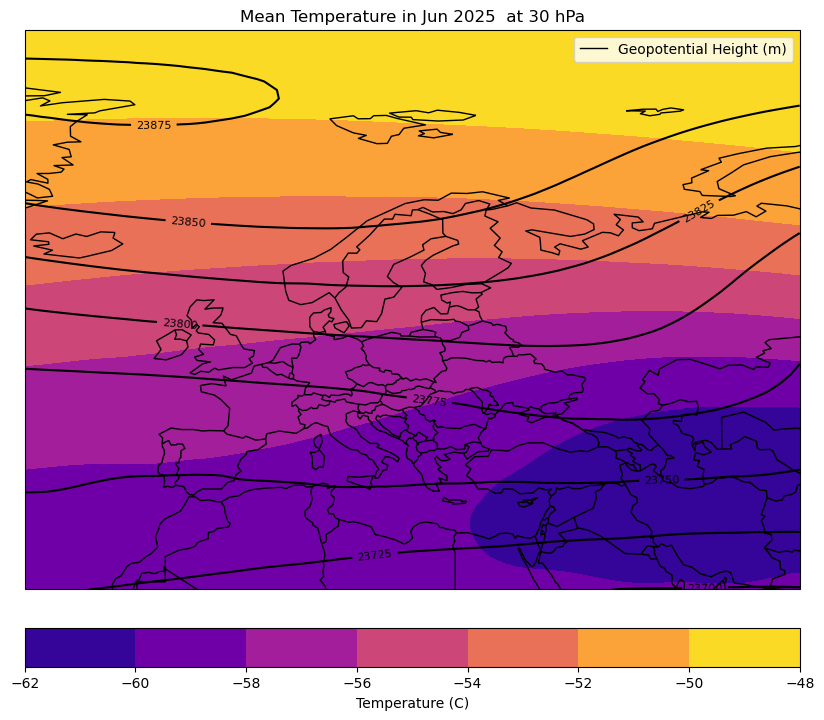

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


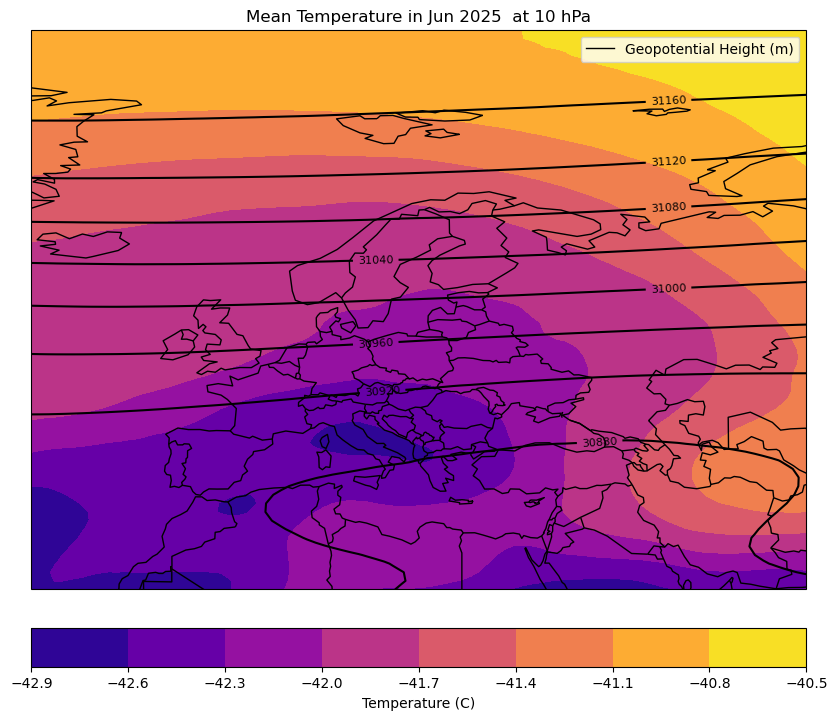

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


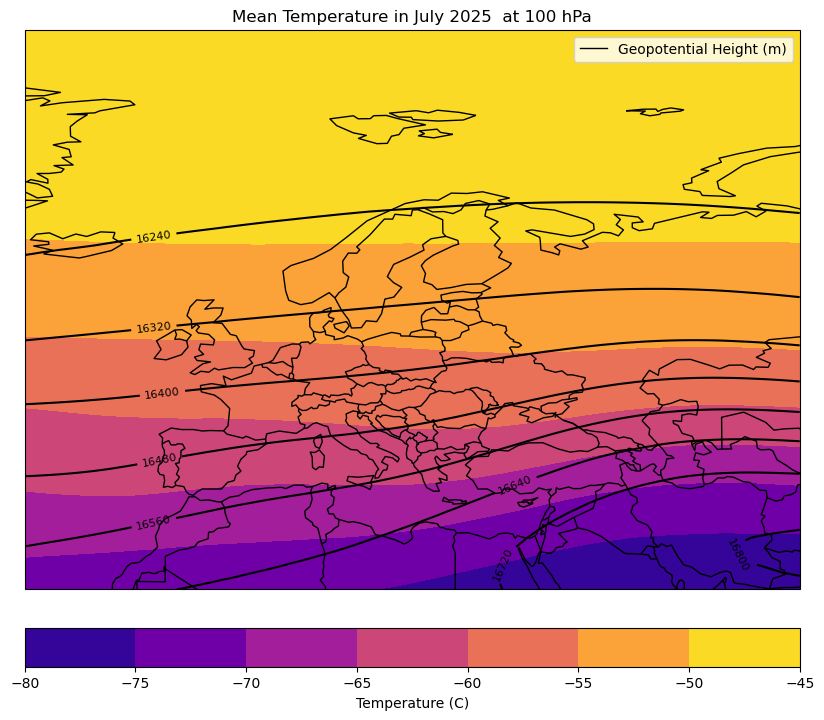

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


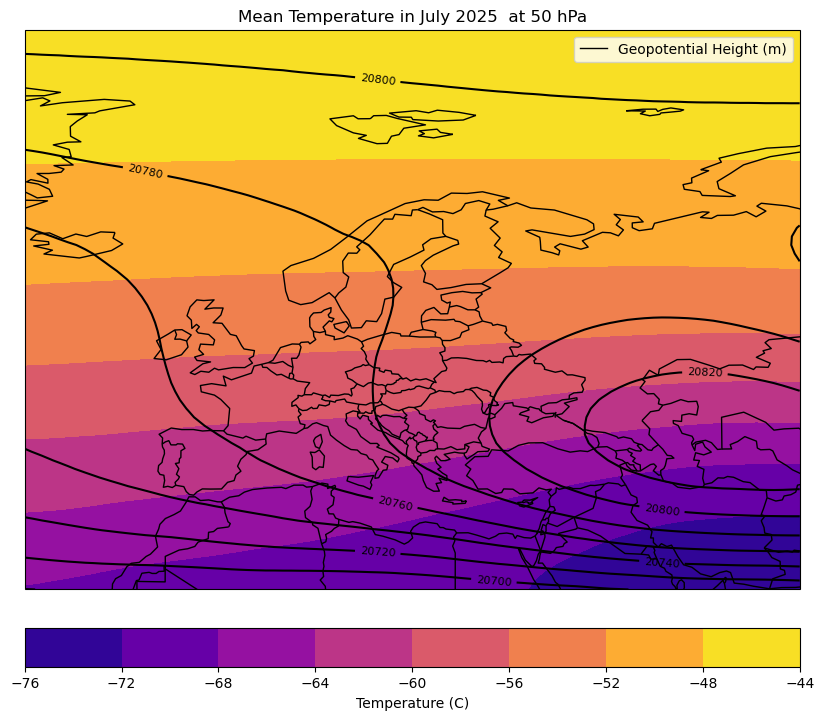

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


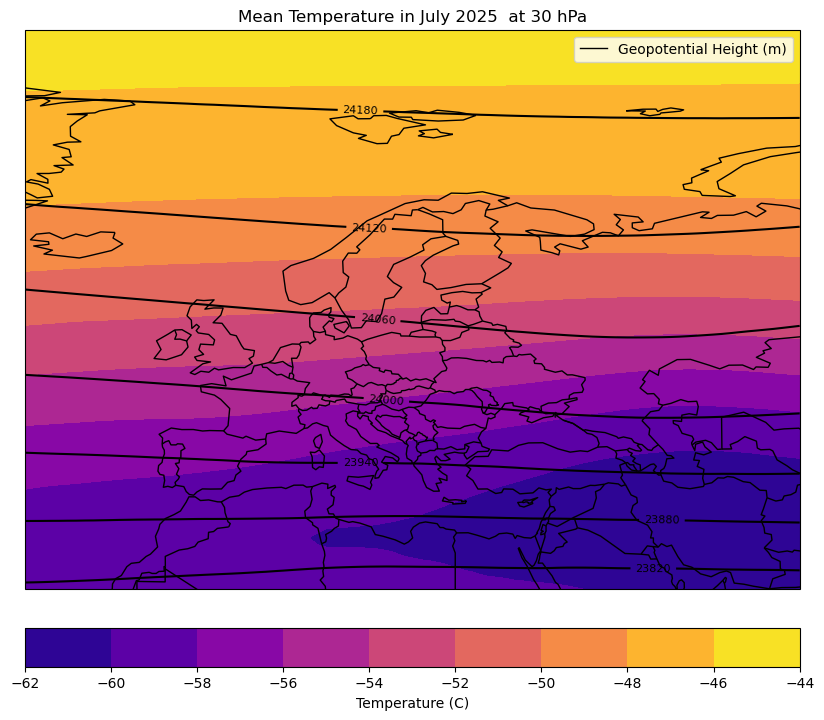

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


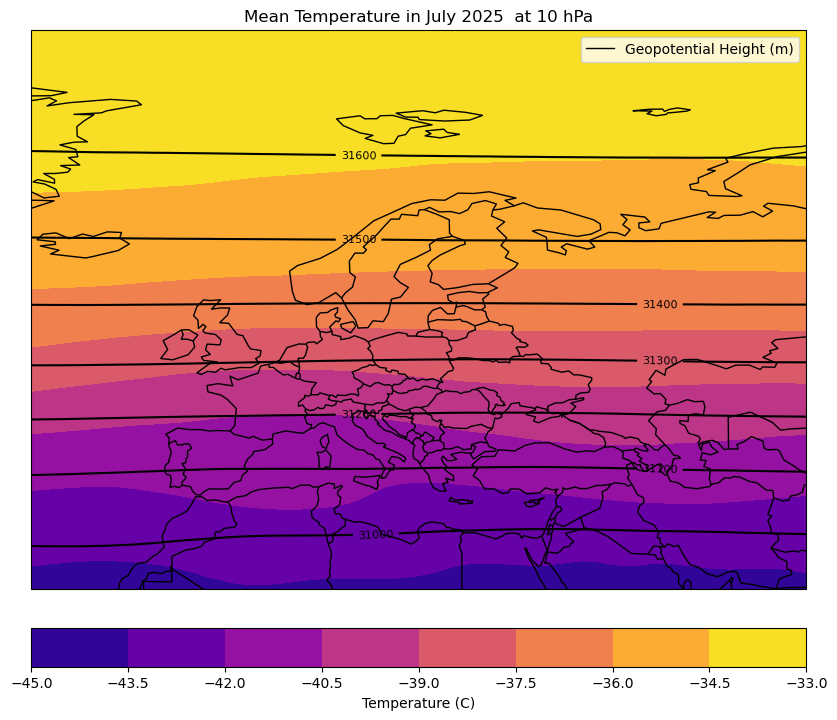

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


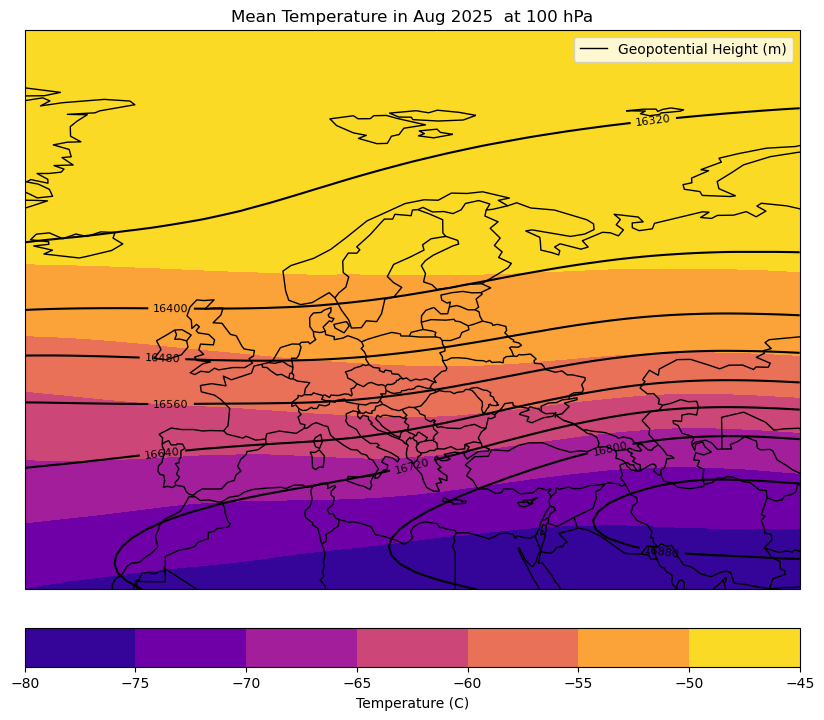

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


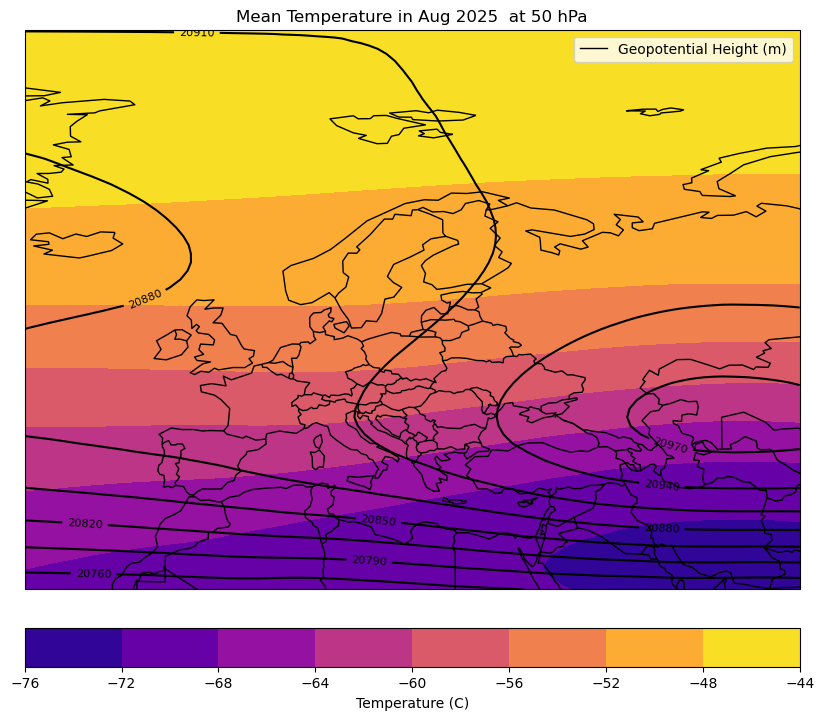

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


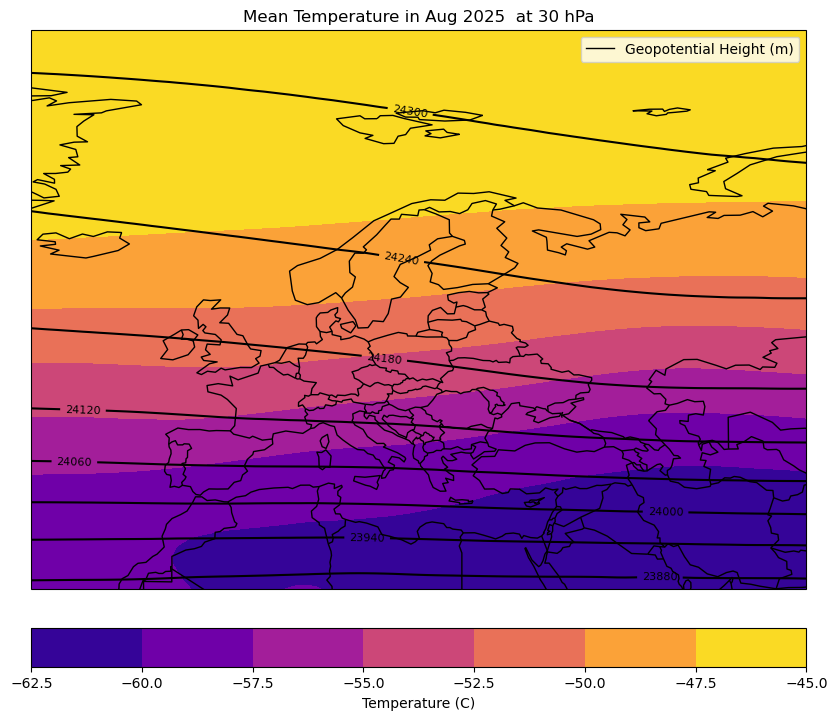

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


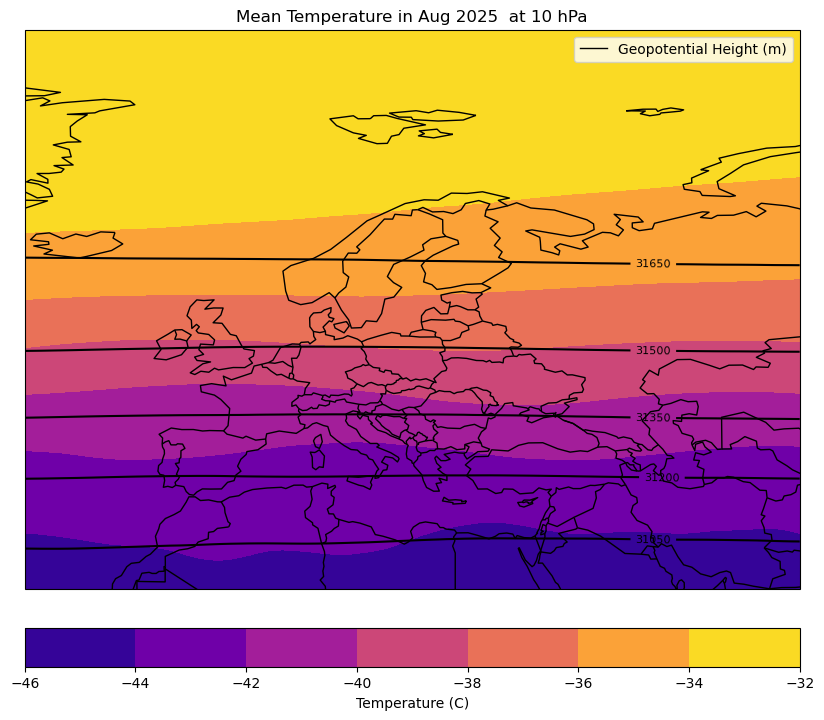

In [ ]:
import cartopy.feature as cfeature
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

for i in range(0,len(df.step)):
    for j in range(0,len(df.isobaricInhPa)):

        # Load dataset (assuming df is already opened with xarray)
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

        # Add coastlines & features
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle='-')

        # Convert dataset projection explicitly if needed
        cf = ax.contourf(df.longitude, df.latitude, df.t[i, j, :, :]-273.15, shading="auto",cmap="plasma")
        c = ax.contour(df.longitude, df.latitude, df.z[i, j, :, :]/9.80665,colors="k")
        legend_handles = [
                 Line2D([0], [0], color="black", lw=1, label="Geopotential Height (m)")
                            ]

        a=plt.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05)
        plt.clabel(c, inline=True, fontsize=8)
        plt.legend(handles=legend_handles, loc="upper right")
        a.set_label("Temperature (C)")
        plt.title(f"Mean Temperature in {dict_month[df_months[i]]} {df_years[i]}  at {int(df.isobaricInhPa[j])} hPa")
        plt.show()